## LIMPIEZA

In [1]:
import pandas as pd
import numpy as np
df2 = pd.read_csv("features3.csv", quotechar='"',
               usecols=['class','post_comment_count',
                'post_favorite_count','post_score',
                'post_view_count','users_reputation','users_up_votes',
                'users_down_votes','score_prev_acceptans',
                'score_prev_ans','score_prev_comment',
                'score_prev_question','score_prev_favquestion',
                'age_user','title_length','num_block_code','num_i_sentences',
                'num_wh_words','num_y_sentences','tags_popularity','num_tags','num_words',
                'code_length', 'num_url','user_numpost','user_numpost_answered','post_answer_count']
                   )
df2.head()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,title_length,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,num_url,code_length
0,0,2,0,3,1279,1377,106,2,0,4,...,111,1,0,0,0,2,4,13.0,1.0,473.0
1,0,2,0,1,334,64,14,0,0,0,...,73,1,9,2,0,1,4,84.0,1.0,1192.0
2,0,2,0,0,118,1,0,0,0,0,...,31,0,5,1,0,1,2,41.0,0.0,0.0
3,0,3,0,0,71,354,35,1,4,7,...,68,0,4,0,0,2,5,50.0,1.0,0.0
4,0,2,0,0,155,1,0,0,0,0,...,36,7,7,2,0,1,2,55.0,0.0,1252.0


Se obtienen estadísticas del dataset para detectar outliers. 

In [4]:
num_features = ['post_comment_count',
                'post_favorite_count','post_score',
                'post_view_count','users_reputation','users_up_votes',
                'users_down_votes','score_prev_acceptans',
                'score_prev_ans','score_prev_comment',
                'score_prev_question','score_prev_favquestion',
                'age_user','title_length','num_block_code','num_i_sentences',
                'num_wh_words','num_y_sentences','tags_popularity','num_tags','num_words','code_length', 'num_url','user_numpost','user_numpost_answered']

In [5]:
df_statistics=pd.DataFrame(index=num_features)
for index, row in df_statistics.iterrows():
    df_statistics.loc[index,"min"]=df2[index].min()
    df_statistics.loc[index,"max"] = df2[index].max()
    df_statistics.loc[index,"mean"] = df2[index].mean()
    df_statistics.loc[index,"std"] = df2[index].std()
    df_statistics.loc[index,"var"] = df2[index].var()
df_statistics

,min,max,mean,std,var
post_comment_count,0.0,38.0,2.834159,3.012957,9.077909e+00
post_favorite_count,0.0,204.0,0.202561,1.706836,2.913289e+00
post_score,-11.0,284.0,0.893491,3.875619,1.502042e+01
post_view_count,5.0,227453.0,400.137276,2541.463799,6.459038e+06
users_reputation,1.0,666690.0,1171.931462,8419.593434,7.088955e+07
users_up_votes,0.0,29496.0,171.001551,698.614051,4.880616e+05
users_down_votes,0.0,11788.0,16.187703,179.118565,3.208346e+04
score_prev_acceptans,-14.0,58871.0,35.585122,554.796780,3.077995e+05
score_prev_ans,-17.0,74441.0,63.038321,780.742229,6.095584e+05
score_prev_comment,0.0,19977.0,25.260793,227.382802,5.170294e+04


Todos los atributos tienen una varianza significativa para considerarlos en el análisis. El atributo age_user tiene un valor negativo, que se elimina del dataset este registro y se analiza las características que tienen valores maximos demasiado elevados. 
El atributo num_words tiene 0 como valor mínimo, esto puede deberse a que la pregunta posee solamente código o texto en tags diferentes a listas y párrafos. Por el momento eliminaremos estos registros y dependiendo de la cantidad que se eliminen, se analizará con mayor de talle el texto de estos registros.

In [6]:
df2= df2.loc[df2['num_words'] >0,:]
df2= df2.loc[df2['age_user'] >=0, :]
df2.describe()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,title_length,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,num_url,code_length
count,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,...,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000
mean,0.499975,2.834159,0.202561,0.893491,400.137276,1171.931462,171.001551,16.187703,35.585122,63.038321,...,53.515684,1.486918,3.677673,1.119566,0.013257,1.449697,3.058482,49.361149,0.412027,1008.508230
std,0.500013,3.012957,1.706836,3.875619,2541.463799,8419.593434,698.614051,179.118565,554.796780,780.742229,...,20.219912,1.419648,3.073334,1.346514,0.126823,0.981637,1.207189,40.341726,0.901729,2024.939943
min,0.000000,0.000000,0.000000,-11.000000,5.000000,1.000000,0.000000,0.000000,-14.000000,-17.000000,...,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,50.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,39.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,25.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,103.000000,93.000000,13.000000,0.000000,0.000000,1.000000,...,50.000000,1.000000,3.000000,1.000000,0.000000,1.000000,3.000000,40.000000,0.000000,367.000000
75%,1.000000,4.000000,0.000000,1.000000,267.000000,560.000000,86.000000,2.000000,4.000000,11.000000,...,64.000000,2.000000,5.000000,2.000000,0.000000,2.000000,4.000000,62.000000,1.000000,1091.000000
max,1.000000,38.000000,204.000000,284.000000,227453.000000,666690.000000,29496.000000,11788.000000,58871.000000,74441.000000,...,150.000000,19.000000,44.000000,14.000000,5.000000,5.000000,5.000000,1521.000000,36.000000,28847.000000


Se eliminaron solamente 6 registros. A continuación se analizará los atributos con valores demasiado altos.

Los valores altos de las características analizadas son de un valor reducido de datos. Creamos una matriz de correlación para identificar atributos que se puedan eliminar por que tienen una alta correlación.

In [7]:
for each in num_features:
    mean, std = df2[each].mean(), df2[each].std()
    df2.loc[:, each] = (df2[each] - mean)/std
df2.describe()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,title_length,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,num_url,code_length
count,19989.000000,1.998900e+04,1.998900e+04,1.998900e+04,1.998900e+04,1.998900e+04,1.998900e+04,1.998900e+04,1.998900e+04,1.998900e+04,...,1.998900e+04,1.998900e+04,1.998900e+04,1.998900e+04,1.998900e+04,1.998900e+04,1.998900e+04,1.998900e+04,1.998900e+04,1.998900e+04
mean,0.499975,-1.308943e-14,5.019805e-15,2.305464e-15,2.254819e-16,7.245283e-16,1.606594e-15,-2.787518e-15,-1.440238e-15,1.718837e-15,...,-2.743205e-16,-6.627258e-15,-3.758208e-15,2.082025e-15,-4.843236e-17,8.094714e-15,7.047286e-15,-3.704748e-15,5.649591e-16,-2.157545e-16
std,0.500013,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-9.406570e-01,-1.186765e-01,-3.068798e+00,-1.554763e-01,-1.390722e-01,-2.447726e-01,-9.037423e-02,-8.937529e-02,-1.025157e-01,...,-1.904839e+00,-1.047385e+00,-1.196640e+00,-8.314550e-01,-1.045341e-01,-1.476816e+00,-1.705186e+00,-1.198787e+00,-4.569295e-01,-4.980435e-01
25%,0.000000,-9.406570e-01,-1.186765e-01,-2.305416e-01,-1.377699e-01,-1.370531e-01,-2.447726e-01,-9.037423e-02,-6.414082e-02,-8.074153e-02,...,-7.178906e-01,-1.047385e+00,-5.458804e-01,-8.314550e-01,-1.045341e-01,-4.581095e-01,-8.768154e-01,-6.038698e-01,-4.569295e-01,-4.980435e-01
50%,0.000000,-2.768572e-01,-1.186765e-01,-2.305416e-01,-1.169158e-01,-1.281453e-01,-2.261643e-01,-9.037423e-02,-6.414082e-02,-7.946070e-02,...,-1.738724e-01,-3.429849e-01,-2.205009e-01,-8.879653e-02,-1.045341e-01,-4.581095e-01,-4.844490e-02,-2.320463e-01,-4.569295e-01,-3.168036e-01
75%,1.000000,3.869426e-01,-1.186765e-01,2.748169e-02,-5.238606e-02,-7.267946e-02,-1.216717e-01,-7.920845e-02,-5.693098e-02,-6.665237e-02,...,5.185145e-01,3.614151e-01,4.302583e-01,6.538620e-01,-1.045341e-01,5.605968e-01,7.799256e-01,3.132948e-01,6.520511e-01,4.073788e-02
max,1.000000,1.167154e+01,1.194007e+02,7.304807e+01,8.933940e+01,7.904397e+01,4.197596e+01,6.572078e+01,1.060486e+02,9.526571e+01,...,4.771748e+00,1.233621e+01,1.312006e+01,9.565764e+00,3.932059e+01,3.616715e+00,1.608296e+00,3.647932e+01,3.946637e+01,1.374781e+01


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd


from operator import itemgetter

matplotlib.style.use('ggplot')
%matplotlib inline

random_state = 1
df = pd.DataFrame(data=df2, index=df2.index, columns=['post_answer_count','code_length'])
df.head()

,post_answer_count,code_length
0,0,-0.264456
1,0,0.090616
2,0,-0.498044
3,0,-0.498044
4,0,0.120246


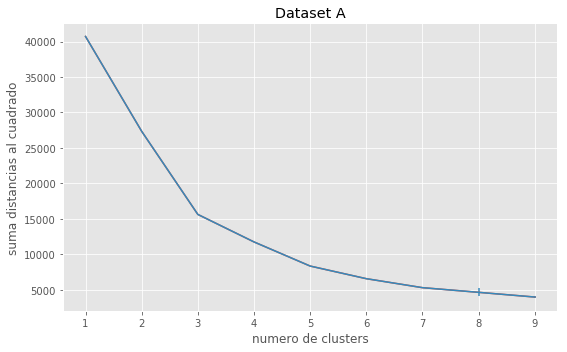

In [15]:

n_cluster_range = range(1, 10)

n_reps = range(10)
km = [KMeans(n_clusters=i) for i in n_cluster_range]

mean_error = []
stdev = [] 
for i in n_cluster_range:
    scores = []
    for rep in n_reps:
        scores.append(-km[i - 1].fit(df).score(df))
    mean_error.append(np.mean(scores))
    stdev.append(np.var(scores))
        

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(n_cluster_range, mean_error)
plt.errorbar(n_cluster_range, mean_error, yerr=stdev)
plt.ylabel("suma distancias al cuadrado")
plt.xlabel("numero de clusters")
plt.title("Dataset A")
plt.tight_layout()

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

data = df             # <----------------- puede cambiar el dataset por Xc
method = 'ward'   # <----------------- puede cambiar el método por 'single', 'complete', 'average', 'ward', 'centroid' o 'median'
num_clusters = 3     # <----------------- puede cambiar el número de cluster por cualquier número entre 1 y 100 (clusters) o 400 (random)

#########################################

matrix = linkage(data, method)
labels = fcluster(matrix, num_clusters, criterion='maxclust')

plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], c=labels)

TypeError: unhashable type: 'slice'

## Conclusiones y trabajo futuro

Las características obtenidas claramente derivan a la clase mayoritaria, El clasificador SVC no identificó las dos clases, mientras que el Decision Tree que clasifica en un 30% las instancias de la clase minoritaria. A este punto creemos que las características obtenidas no son suficientes para la diferenciación de las clases, por lo que proponemos algunas tareas para la siguiente etapa: 

* Obtener nuevas futures respecto a la calidad e historial de usuario.
* Además deseamos clusterizar los datos incluyendo los valores eliminados, que permitan identificar grupos representativos.
* Utilizar un conjunto mayor de datos, aumentar datos equiparando las clases para evaluar nuevamente los clasificadores.

## Consideración de observaciones

* En esta etapa del trabajo se aclararon los objetivos e hipótesis que no estuvieron claras y no se comunicaron de forma efectiva.
* Se consideraron las observaciones que sugerían se analice algunos papers relacionados a examinar la calidad de una pregunta y los tags marcados en cada una. Esta observación fue redundante y considerando que nuestro objetivo era predecir si una pregunta tendrá una respuesta, consideramos esta tarea necesaria e indispensable para continuar con el trabajo. 
* En el presente informe se detallan todas las acciones realizadas en la exploración de los datos, sin embargo para la presentación se tomarán en cuenta las más relevantes. 